# 2023.08.16 인공지능연구회 강습회 실습 (강사: 숙명여자대학교 심주용)
# Lab1: ANN


## 1. Gradient Tape
The **Gradient Tape** is a core feature in TensorFlow used for automatic differentiation, allowing us to compute gradients with respect to some given inputs. This is extremely useful in training machine learning models via gradient-based optimization techniques. Here's a tutorial to help you understand how to work with Gradient Tape in TensorFlow:

$x = x^2$

Gradient Tape Reference: https://www.tensorflow.org/api_docs/python/tf/GradientTape/

 ![GT](https://raw.githubusercontent.com/jooyongsim/AI_tutorials_2023/main/photos/gradient_tape.png)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
plt.rcParams['figure.figsize'] = [7, 6]

x = tf.constant(3.0)
with tf.GradientTape() as g:
  g.watch(x)
  y = x * x
dy_dx = g.gradient(y, x)
print(dy_dx)

tf.Tensor(6.0, shape=(), dtype=float32)


## 2. Machine Learning with TensorFlow


### 2.1. Linear Regression

Given  $x$ and  $y$, we want to estimate $w$ and $b$

**$\hat{y}=wx+b$**

### **Given Variables**

- $ x $ and $ y $: These are variables representing input and output in a dataset. Typically, $ x $ is an independent variable (e.g., a feature of the data), and $ y $ is a dependent variable (e.g., a label or target to be predicted).




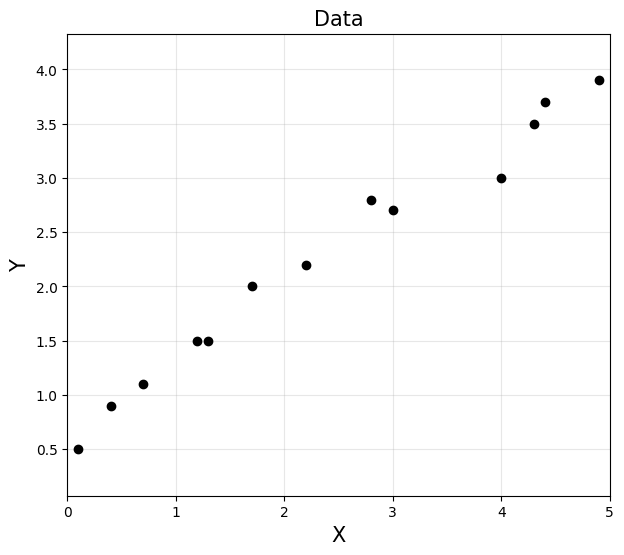

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Creating data points as column vectors
# train_x and train_y represent the input and output of the training data
train_x = np.array([0.1, 0.4, 0.7, 1.2, 1.3, 1.7, 2.2, 2.8, 3.0, 4.0, 4.3, 4.4, 4.9]).reshape(-1, 1)
train_y = np.array([0.5, 0.9, 1.1, 1.5, 1.5, 2.0, 2.2, 2.8, 2.7, 3.0, 3.5, 3.7, 3.9]).reshape(-1, 1)

# Storing the number of training examples
m = train_x.shape[0]

plt.figure()
plt.plot(train_x, train_y, 'ko')
plt.title('Data', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.xlim([0, 5])
plt.show()

### Optimzation

### **Objective**

- **Estimating $ w $ and $ b $**: The goal of linear regression is to find the values of the weight $ w $ and bias $ b $ that best describe the relationship between $ x $ and $ y $. These values define a linear function that models the data.

### **Data Points**

- **Given $ (x_i, y_i) $ for $ i = 1, \ldots, m $**: This means that there are $ m $ pairs of corresponding input and output data points, with $ x_i $ representing the $ i $-th input and $ y_i $ representing the $ i $-th output.

###**Linear Relationship**

- **$ y_i = wx_i + b $**: This equation defines a linear relationship between the input $ x_i $ and the output $ y_i $, where $ w $ is the slope or weight, and $ b $ is the y-intercept or bias. This is the equation of a straight line, and the goal is to find the values of $ w $ and $ b $ that best fit the given data.

### **Objective Function**

- **$ \displaystyle \min_{w,b}{\sum_{i=1}^{n}{(\hat{y_i}−y_i)^2}} $**: This is the objective function for linear regression, also known as the loss function. It represents the sum of the squared differences between the predicted values $\hat{y_i}$ (calculated as $ wx_i + b $) and the actual values $ y_i $. The goal is to find the values of $ w $ and $ b $ that minimize this sum, hence the use of the $\min$ symbol.



 optimal w = [[0.74257565]]

 optimal b = [[0.41717836]]


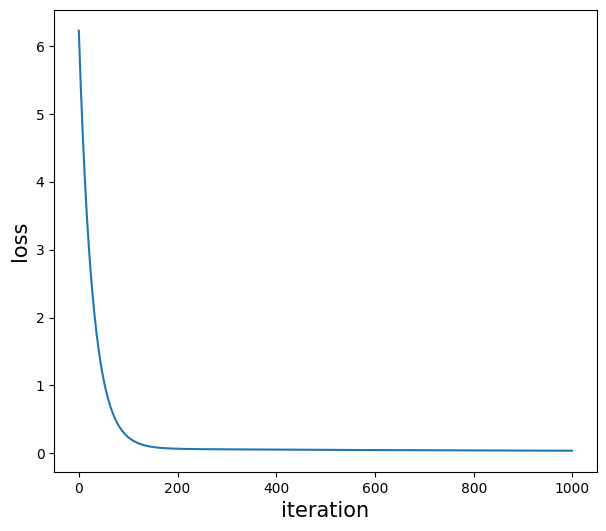

In [16]:
LR = 0.001
n_iter = 10000

w = tf.Variable([[0]], dtype = tf.float32)
b = tf.Variable([[0]], dtype = tf.float32)

loss_record = []
for i in range(1000):
    with tf.GradientTape() as tape:
        cost = tf.reduce_mean(tf.square(w*train_x + b - train_y))
        w_grad, b_grad = tape.gradient(cost, [w,b])

    loss_record.append(cost)
    w.assign_sub(LR * w_grad)
    b.assign_sub(LR * b_grad)
print("\n optimal w =", w.numpy())
print("\n optimal b =", b.numpy())
w_val = w.numpy()
b_val = b.numpy()

plt.figure()
plt.plot(loss_record)
plt.xlabel('iteration', fontsize = 15)
plt.ylabel('loss', fontsize = 15)
plt.show()

### Prediction
We will outline a simple linear regression problem. Given a set of data points $ (x_i, y_i) $, the task is to find the best-fitting straight line described by the equation $ y_i = wx_i + b $. The "best" line is determined by minimizing the sum of the squared differences between the predicted values and the actual values, as expressed in the given objective function.

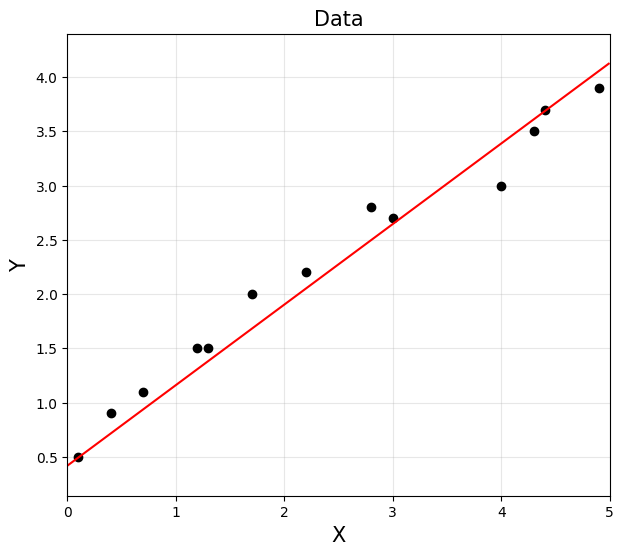

In [17]:
xp = np.arange(0, 5, 0.01).reshape(-1, 1)
yp = w_val*xp + b_val

plt.figure()
plt.plot(train_x, train_y, 'ko')
plt.plot(xp, yp, 'r')
plt.title('Data', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.xlim([0, 5])
plt.show()

### 2.2. Logistic Regression

Train a logistic regression model to classify the generated data points. This involves defining the logistic loss function and utilizing gradient descent to minimize this loss:

$ \displaystyle \ell{(w)} = \log{L(w)} =  \frac{1}{m} \sum_{i=1}^m y_i \log{(h_w(x_i))} + (1 - y_i) \log(1 - h_w(x_i)) $

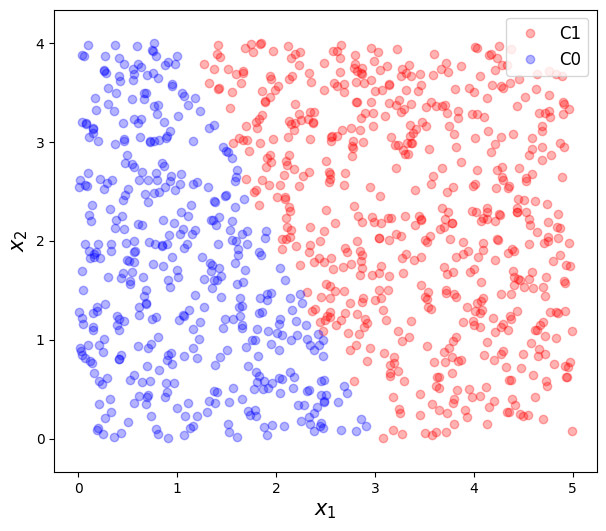

In [18]:
# datat generation

m = 1000
true_w = np.array([[-6], [2], [1]])
train_X = np.hstack([np.ones([m,1]), 5*np.random.rand(m,1), 4*np.random.rand(m,1)])

true_w = np.asmatrix(true_w)
train_X = np.asmatrix(train_X)

train_y = 1/(1 + np.exp(-train_X*true_w)) > 0.5

C1 = np.where(train_y == True)[0]
C0 = np.where(train_y == False)[0]

train_y = np.empty([m,1])
train_y[C1] = 1
train_y[C0] = 0

plt.figure()
plt.plot(train_X[C1,1], train_X[C1,2], 'ro', alpha = 0.3, label='C1')
plt.plot(train_X[C0,1], train_X[C0,2], 'bo', alpha = 0.3, label='C0')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.ylim([0,4])
plt.show()

[[-4.1495585 ]
 [ 1.748942  ]
 [ 0.45723364]]


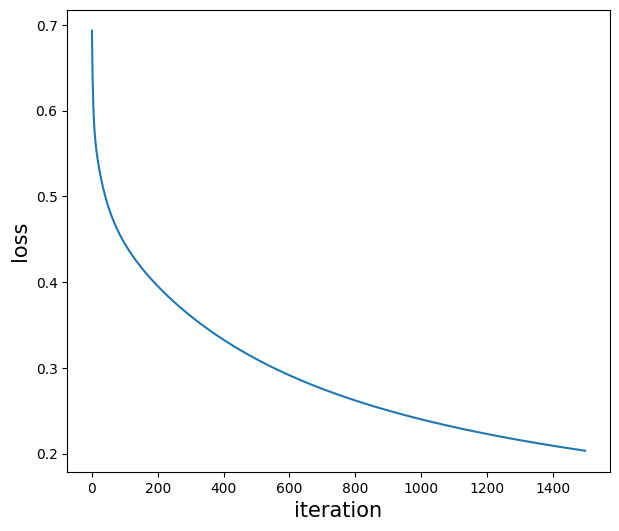

In [19]:
LR = 0.05
n_iter = 1500

w = tf.Variable([[0],[0],[0]], dtype = tf.float32)
train_x = tf.constant(train_X, dtype= tf.float32)
train_y = tf.constant(train_y, dtype= tf.float32)

loss_record = []
for i in range(n_iter):
    with tf.GradientTape() as tape:
        y_pred = tf.sigmoid(tf.matmul(train_x, w))
        loss = - train_y*tf.math.log(y_pred) - (1-train_y)*tf.math.log(1-y_pred)
        loss = tf.reduce_mean(loss)
        w_grad = tape.gradient(loss, w)

    loss_record.append(loss)
    w.assign_sub(LR * w_grad)

w_hat = w.numpy()
print(w_hat)

plt.figure()
plt.plot(loss_record)
plt.xlabel('iteration', fontsize = 15)
plt.ylabel('loss', fontsize = 15)
plt.show()

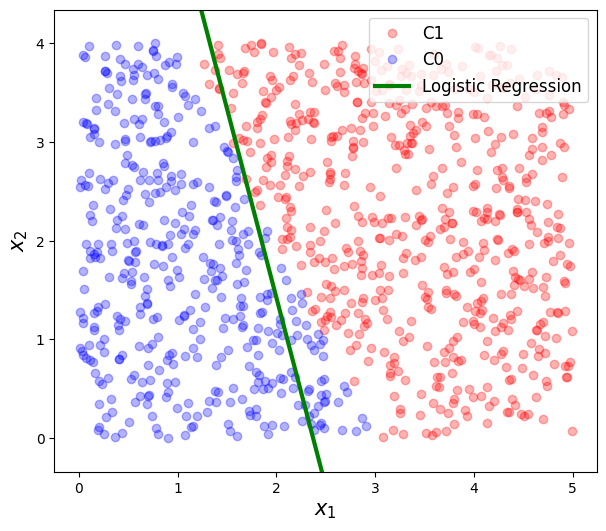

In [20]:
xp = np.arange(0, 4, 0.01).reshape(-1, 1)
yp = - w_hat[1,0]/w_hat[2,0]*xp - w_hat[0,0]/w_hat[2,0]

plt.figure()
plt.plot(train_X[C1,1], train_X[C1,2], 'ro', alpha = 0.3, label = 'C1')
plt.plot(train_X[C0,1], train_X[C0,2], 'bo', alpha = 0.3, label = 'C0')
plt.plot(xp, yp, 'g', linewidth = 3, label = 'Logistic Regression')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.ylim([0,4])
plt.show()

[[-139.67763 ]
 [  46.51919 ]
 [  23.362755]]


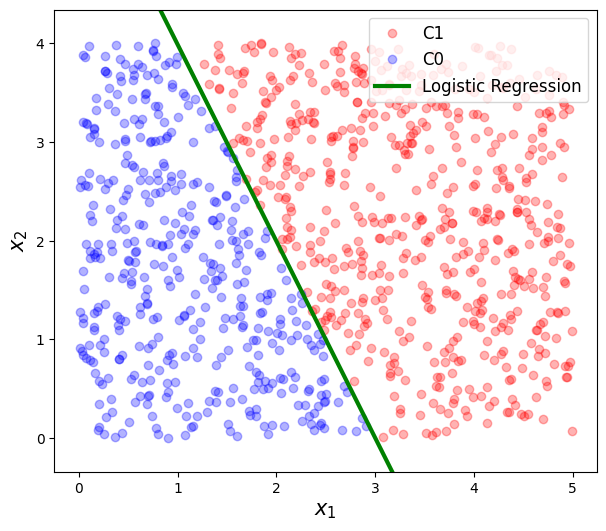

In [21]:
LR = 0.05
n_iter = 1500

w = tf.Variable([[0],[0],[0]], dtype = tf.float32)
train_x = tf.constant(train_X, dtype= tf.float32)
train_y = tf.constant(train_y, dtype= tf.float32)

loss_record = []
for i in range(n_iter):
    with tf.GradientTape() as tape:
        y_pred = tf.matmul(train_x,w)
        loss = tf.nn.sigmoid_cross_entropy_with_logits(labels = train_y,logits = y_pred)
        w_grad = tape.gradient(loss, w)

    loss_record.append(loss)
    w.assign_sub(LR * w_grad)

w_hat = w.numpy()
print(w_hat)

xp = np.arange(0, 4, 0.01).reshape(-1, 1)
yp = - w_hat[1,0]/w_hat[2,0]*xp - w_hat[0,0]/w_hat[2,0]

plt.figure()
plt.plot(train_X[C1,1], train_X[C1,2], 'ro', alpha = 0.3, label = 'C1')
plt.plot(train_X[C0,1], train_X[C0,2], 'bo', alpha = 0.3, label = 'C0')
plt.plot(xp, yp, 'g', linewidth = 3, label = 'Logistic Regression')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.ylim([0,4])
plt.show()